In [1]:
#  Simple Binary Classification using PyTorch

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # 1 = Setosa, 0 = Not Setosa



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [4]:
model = nn.Sequential(
    nn.Linear(4, 8),   # input layer → 8 neurons
    nn.ReLU(),         # activation
    nn.Linear(8, 1),   # hidden → output
    nn.Sigmoid()       # sigmoid for binary output
)



In [5]:
loss_fn = nn.BCELoss()                # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)



In [6]:
losses = []
for epoch in range(30):
    y_pred = model(X_train)           # Forward pass
    loss = loss_fn(y_pred, y_train)   # Calculate loss
    optimizer.zero_grad()             # Clear gradients
    loss.backward()                   # Backpropagation
    optimizer.step()                  # Update weights
    losses.append(loss.item())
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/30], Loss: {loss.item():.4f}")


Epoch [5/30], Loss: 0.7054
Epoch [10/30], Loss: 0.6043
Epoch [15/30], Loss: 0.5137
Epoch [20/30], Loss: 0.4292
Epoch [25/30], Loss: 0.3511
Epoch [30/30], Loss: 0.2798



 Test Accuracy: 1.0


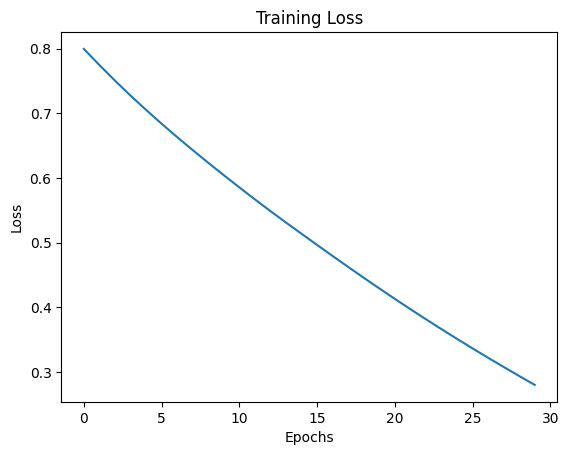

In [7]:
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_class = (y_pred_test > 0.5).float()
    accuracy = (y_pred_class.eq(y_test).sum() / y_test.shape[0]).item()

print("\n Test Accuracy:", accuracy)

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [8]:

# Step 9: Show predictions
print("Predicted Labels:", y_pred_class[:10].view(-1).numpy())
print("Actual Labels:   ", y_test[:10].view(-1).numpy())


Predicted Labels: [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual Labels:    [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
